<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Team: TEAM 2</h3><br>
<h3>Pre- processing

In [2]:
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Specifying file path
file = '/Users/vivi/Desktop/Computational Data Analytics with Python /FY- Scripts 5-9 (Guided)/datasets/Ames_Housing_Dataset.xlsx'

# Reading the file into Python
housing = pd.read_excel(io     = file,
                        header = 0   )


# Dropping Order, Overall_Qual, Overall_Cond, Street, Lot_Config, Neighborhood, Garage_Cars, Garage_Area,
#          Full_Bath, Half_Bath, Fireplaces, Kitchen_AbvGr, Pool_Area
# Because we don't need these
housing.drop(labels  = ['Order', 'Overall_Qual', 'Overall_Cond', 'Street','Lot_Config','Neighborhood','Garage_Cars','Garage_Area',
                        'Full_Bath','Half_Bath','Fireplaces','Kitchen_AbvGr','Pool_Area'],
             axis    = 1,
             inplace = True)

In [3]:
# Search for the null values
housing.isnull().sum(axis = 0) 

Lot_Area          0
Mas_Vnr_Area     23
Total_Bsmt_SF     1
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
TotRms_AbvGr      0
Porch_Area        0
Sale_Price        0
dtype: int64

In [4]:
# Filling the null values
housing['Mas_Vnr_Area'].fillna(value   = 0   ,
                               inplace = True)
housing['Total_Bsmt_SF'].fillna(value   = 0   ,
                               inplace = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>

<h3>1. Total Living Area:</h3><br>
We believe the total living area is an important metric with a strong positive correlation to the Sale Price. Indeed, a higher total living area translates to a higher sale price. It is a very straightforward metric assessing the preference of the buyer. It is the primary focus of buyers because they know it directly impacts the Sale Price.<br><br>
Knowing the total living area as the sum of the living area and basement can add value for potential buyers in several ways. One way is the space assessment, as buyers could get a better understanding of the overall space that is available. This information helps them to evaluate whether the property meets their individual needs (large family, needed extra space for hobbies or work, etc.). In addition to that the functional use of the additional space. Basements can be finished or unfinished but knowing the overall space can help to assess whether it could be converted to an additional living space, home office, guest room, or gym. In summary, it provides a more comprehensive understanding of the property’s size and functionality.

<h3>2. Land To Building Ratio:</h3><br>
We expected a negative correlation between the Land to Building ratio and Sale Price because it means a lower lot on a much larger structure. Less living structure is often undesirable for homeowners. It is nonetheless an important metric because it could be of interest to people who might look to expand their living structure, and people who need outdoors for various reasons such as kids or else.<br><br>
Knowing the land to building ratio helps buyers to get an understanding of how efficiently the property utilizes the available land. A lower ratio means that the building occupies a larger proportion of the lot, indicating a more compact or dense development. Whereas a higher ratio indicates more open space compared to the building footprint. In addition to that, buyers often desire a certain amount of outdoor space, and understanding the land to building ratio helps them to evaluate the balance between indoor and outdoor areas. Moreover, it can influence the perceived value of the property as buyers might view a higher ratio favorably in case they value spacious outdoor areas or see potential for future developments. Overall, the land to building ratio provides potential buyers to get more valuable insights into the property’s layout, helping them make informed decisions according to their individual preferences and priorities.

<h3>3. Room Density:</h3><br>
This metric is expected to have a slight negative correlation with the Sale Price because a property with too many rooms in the living area might lower its value since it cramps up the place. A higher number of rooms might be appealing, however, the way they are organized in the living space can lower the property value. The metric helps determine the spaciousness of the house. Oftentimes, a lower number of rooms for a high living space might mean openness and potentially luxury.<br><br>
Knowing the room density of the house provides an important measure of how efficiently the living area is utilized in terms of the number of rooms. A higher density means that the living space is divided into smaller rooms, providing more rooms for specific functions like bedrooms, offices, and storage. A lower room density indicates larger rooms and more open living areas. This is especially interesting for larger families that want to have a full bedroom for each child and maybe need several offices. Overall it provides insights into the spatial layout and functionality of the property.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>

In [5]:
# Feature 1: Total Living Area

housing['TotalLivingArea'] = housing['Gr_Liv_Area'] + housing['Total_Bsmt_SF']

In [6]:
# Feature 2 Land To Building Ratio

housing['LandToBuildingRatio'] = housing['Lot_Area'] / housing['Gr_Liv_Area']

<br>

In [7]:
# Feature 3 Room Density

housing['RoomDensity'] = housing['TotRms_AbvGr'] / housing['Gr_Liv_Area']

<br>

In [8]:
# Checking the results

housing.head(n=5)

,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,TotRms_AbvGr,Porch_Area,Sale_Price,TotalLivingArea,LandToBuildingRatio,RoomDensity
0,31770,112.0,1080.0,1656,0,1656,7,272,215000,2736.0,19.184783,0.004227
1,11622,0.0,882.0,896,0,896,5,260,105000,1778.0,12.970982,0.005580
2,14267,108.0,1329.0,1329,0,1329,6,429,172000,2658.0,10.735139,0.004515
3,11160,0.0,2110.0,2110,0,2110,8,0,244000,4220.0,5.289100,0.003791
4,13830,0.0,928.0,928,701,1629,6,246,189900,2557.0,8.489871,0.003683


In [9]:
# Log transforming these columns
housing['log_Lot_Area'] = np.log1p(housing['Lot_Area'])
housing['log_Mas_Vnr_Area'] = np.log1p(housing['Mas_Vnr_Area'])
housing['log_Total_Bsmt_SF'] = np.log1p(housing['Total_Bsmt_SF'])
housing['log_First_Flr_SF'] = np.log1p(housing['First_Flr_SF'])
housing['log_Second_Flr_SF'] = np.log1p(housing['Second_Flr_SF'])
housing['log_Gr_Liv_Area'] = np.log1p(housing['Gr_Liv_Area'])
housing['log_TotRms_AbvGr'] = np.log1p(housing['TotRms_AbvGr'])
housing['log_Porch_Area'] = np.log1p(housing['Porch_Area'])
housing['log_Sale_Price'] = np.log1p(housing['Sale_Price'])
housing['log_TotalLivingArea'] = np.log1p(housing['TotalLivingArea'])
housing['log_LandToBuildingRatio'] = np.log1p(housing['LandToBuildingRatio'])
housing['log_RoomDensity'] = np.log1p(housing['RoomDensity'])

# Show results
housing.skew(axis = 0).round(decimals = 2)

Lot_Area                   12.82
Mas_Vnr_Area                2.62
Total_Bsmt_SF               1.15
First_Flr_SF                1.47
Second_Flr_SF               0.87
Gr_Liv_Area                 1.27
TotRms_AbvGr                0.75
Porch_Area                  1.38
Sale_Price                  1.74
TotalLivingArea             1.51
LandToBuildingRatio         8.70
RoomDensity                 0.41
log_Lot_Area               -0.50
log_Mas_Vnr_Area            0.54
log_Total_Bsmt_SF          -4.94
log_First_Flr_SF            0.06
log_Second_Flr_SF           0.31
log_Gr_Liv_Area             0.02
log_TotRms_AbvGr            0.03
log_Porch_Area             -1.36
log_Sale_Price             -0.01
log_TotalLivingArea        -0.36
log_LandToBuildingRatio     0.08
log_RoomDensity             0.41
dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop a correlation matrix or a heatmap to show the linear relationships between your five new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

In [10]:
# Analyzing (Pearson) correlations

# Selected the columns for new features

selected_columns = [
    'LandToBuildingRatio', 
    'log_LandToBuildingRatio', 
    'RoomDensity', 
    'log_RoomDensity', 
    'TotalLivingArea', 
    'log_TotalLivingArea', 
    'Sale_Price', 
    'log_Sale_Price'
]


# Correlation for Sale Price and Log Sale Price to the selected columns
df_selected_corr = housing[selected_columns].corr(method='pearson').round(2)


df_sorted_corr_sale_price = df_selected_corr.loc[selected_columns, ['Sale_Price', 'log_Sale_Price']].sort_values(by='Sale_Price', ascending=False)

# Printing the results
df_sorted_corr_sale_price

,Sale_Price,log_Sale_Price
Sale_Price,1.00,0.95
log_Sale_Price,0.95,1.00
TotalLivingArea,0.79,0.78
log_TotalLivingArea,0.76,0.80
LandToBuildingRatio,-0.06,-0.09
log_LandToBuildingRatio,-0.09,-0.11
RoomDensity,-0.55,-0.59
log_RoomDensity,-0.55,-0.59


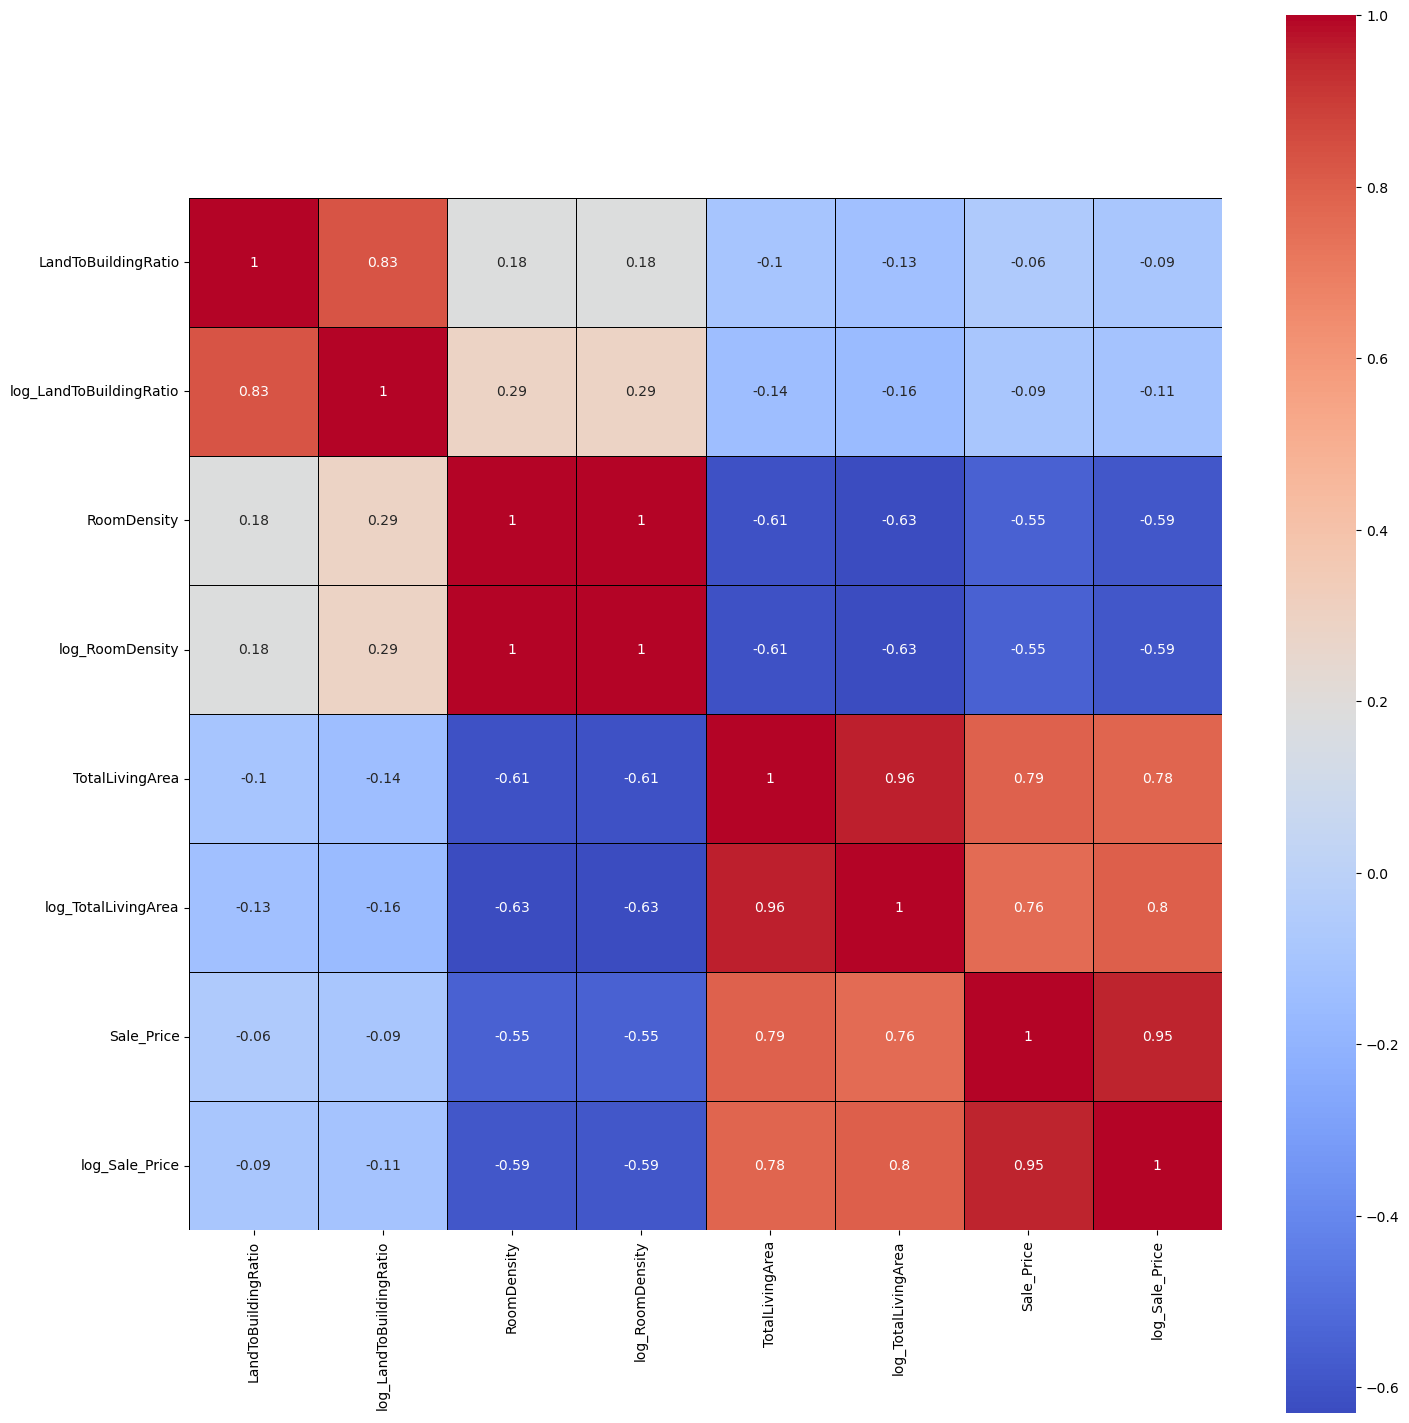

In [11]:
# Create Heatmap


# Setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# Visualizing the correlation matrix
sns.heatmap(df_selected_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# Layout and rendering
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
Did each engineered feature perform as expected? Why or why not? 

<h3>Total Living Area</h3><br>
The Total Living Area performed as expected, exhibiting strong positive correlations with both Sale_Price and log_Sale_Price. This reinforces the premise that larger living spaces, which typically offer greater functionality and appeal to buyers, command higher prices in the housing market.


<h3>Land to Building Ratio</h3><br>
The Land to Building Ratio did not perform as expected; the correlations suggest that the land to building ratio has almost no linear relationship with the sale price in this dataset. This discrepancy did not align perfectly with expectations due to varying buyer preferences. Considering market-specific factors, it was thought that a smaller living structure on a larger lot was thought to be less desirable due to high maintenance, functionality, location, and other considerations. Interest in outdoor space or expansion potential could still positively influence some buyers.


<h3>Room Density</h3><br>
The Room Density performed as expected, with the assumption that fewer rooms or more spacious rooms would be associated with a higher sale price. However, the slight negative correlation between Room Density and Sale Price suggests that while a higher number of rooms is generally viewed positively, issues such as overcrowding or poor layout detract from a property's appeal. This finding aligns with the expectation that spaciousness is valued, indicating that buyers may prefer homes with larger, fewer rooms, equating spaciousness with luxury or comfort.
